# **k-Means Clustering**

Clustering algorithms seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points.

Many clustering algorithms are available in Scikit-Learn and elsewhere, but perhaps the simplest to understand is an algorithm known as k-
means clustering, which is implemented in sklearn.cluster.KMeans .

We begin with the standard imports:

In [20]:
# Import Libraroies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/content/sample_data/diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


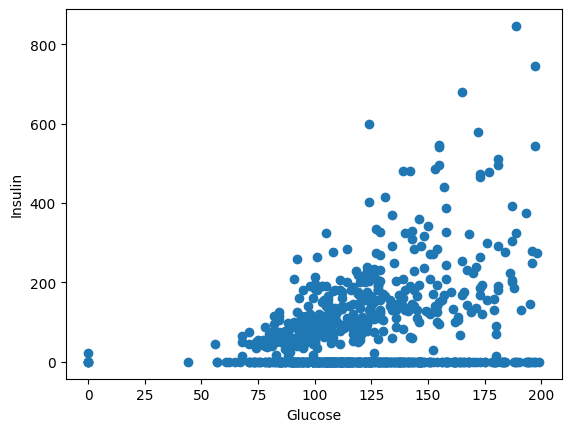

In [9]:
#data1 visualization
plt.scatter(data['Glucose'], data['Insulin'])
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()

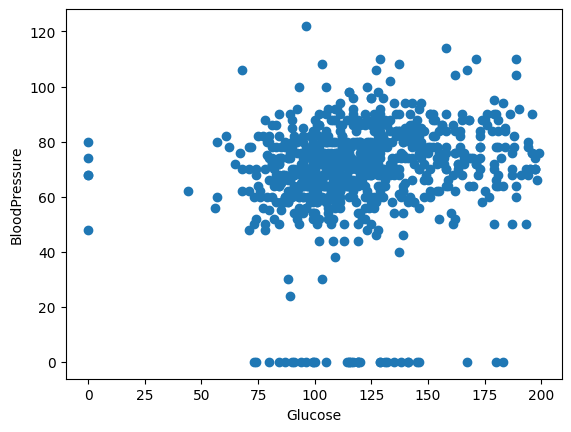

In [10]:
#data2 visualization
plt.scatter(data['Glucose'], data['BloodPressure'])
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(data)
kmeans.cluster_centers_.shape

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(2, 9)

In [18]:
y_pred = kmeans.predict(data)
labels = np.zeros_like(clusters)
for i in range(2):
    mask = (clusters == i)
    labels[mask] = y_pred[mask]
acc = accuracy_score(y_pred, labels)
print("Acurracy:-",acc*100,"%")

Acurracy:- 100.0 %


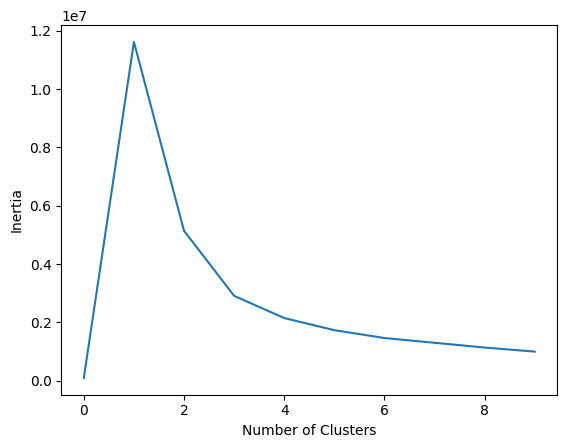

In [21]:
iner_list = np.empty(10)
for i in range(1,10):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(data)
    iner_list[i] = kmeans2.inertia_

# iner_list = iner_list%100
# show the best number in graph
plt.plot(range(0,10), iner_list,'-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


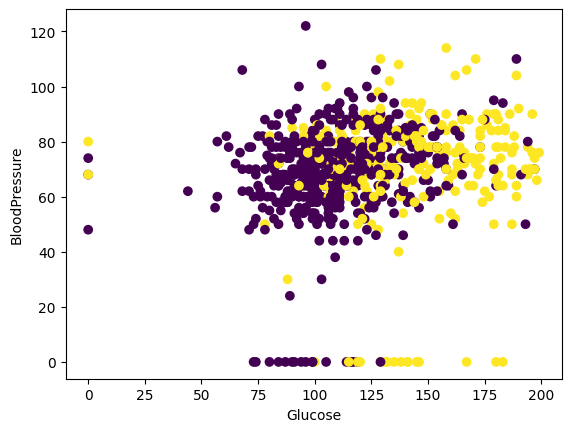

In [22]:
plt.scatter(data['Glucose'], data['BloodPressure'], c = data['Outcome'])
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.show()

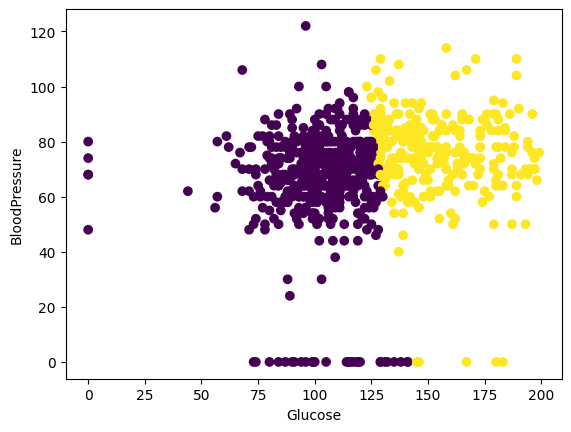

In [23]:
# data2 create
data2 = data.loc[:, ['Glucose', 'BloodPressure']]
# KMEANS 2
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(data2)
labels2 = kmeans2.predict(data2)

# visualization
plt.scatter(data['Glucose'], data['BloodPressure'], c = labels2)
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.show()

# **Example 2 image compression**

One interesting application of clustering is in color compression within images (this example is adapted from Scikit-Learn's "Color Quantization
Using K-Means". For example, imagine you have an image with millions of colors. In most images, a large number of the colors will be unused,
and many of the pixels in the image will have similar or even identical colors.
For example, consider the image shown in the following figure, which is from the Scikit-Learn datasets module (for this to work, you'll have to
have the PIL Python package installed): (For a color version of this and following images, see the online version of this book).

In [28]:
!pip install Pillow

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [39]:
image = plt.imread("/content/sample_data/Free Photo _ Beautiful scenery of the emerald lake in yoho national park, british columbia, canada.jpg")

array([[[225, 230, 224],
        [222, 227, 221],
        [222, 224, 219],
        ...,
        [226, 225, 223],
        [227, 226, 224],
        [227, 226, 224]],

       [[227, 232, 226],
        [224, 229, 223],
        [223, 225, 220],
        ...,
        [226, 225, 223],
        [226, 225, 223],
        [224, 223, 221]],

       [[228, 231, 224],
        [226, 229, 222],
        [223, 224, 218],
        ...,
        [224, 224, 224],
        [224, 224, 224],
        [223, 223, 223]],

       ...,

       [[114, 162, 136],
        [ 72, 120,  94],
        [ 70, 116,  90],
        ...,
        [ 82, 176, 152],
        [ 82, 176, 152],
        [ 83, 177, 153]],

       [[153, 198, 175],
        [119, 164, 141],
        [130, 174, 151],
        ...,
        [ 88, 180, 157],
        [ 82, 174, 151],
        [ 87, 179, 156]],

       [[145, 190, 169],
        [114, 159, 138],
        [129, 173, 150],
        ...,
        [ 90, 179, 157],
        [ 84, 173, 151],
        [ 89, 178, 156]]], dtype=uint8)
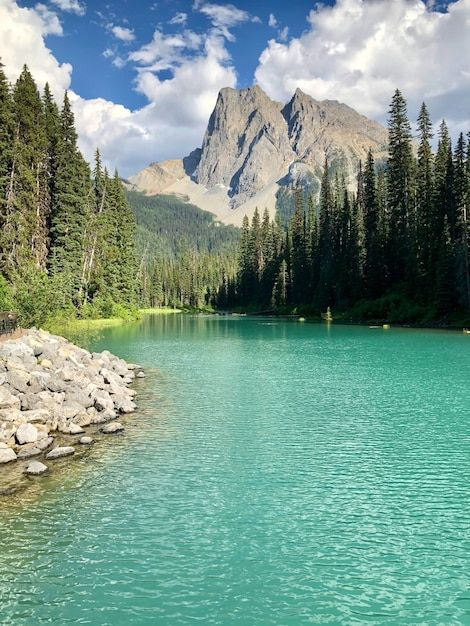

In [40]:
# Convert the image to a 2D array
image_array = np.array(image)

# Reshape the image array into a 2D array with each row representing a pixel
image_2d = image_array.reshape(-1, 3)

# Create a KMeans object with 5 clusters
kmeans = KMeans(n_clusters=5)

# Fit the KMeans object to the data
kmeans.fit(image_2d)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_
image_array

In [41]:
# Create a new image using the cluster centers
new_image_2d = np.zeros_like(image_2d)
for i, pixel in enumerate(image_2d):
  closest_cluster = np.argmin(np.linalg.norm(pixel - cluster_centers, axis=1))
  new_image_2d[i] = cluster_centers[closest_cluster]

# Reshape the new image array into a 3D array
new_image_array = new_image_2d.reshape(image_array.shape)

# Convert the new image array to an image
new_image = Image.fromarray(new_image_array.astype(np.uint8))

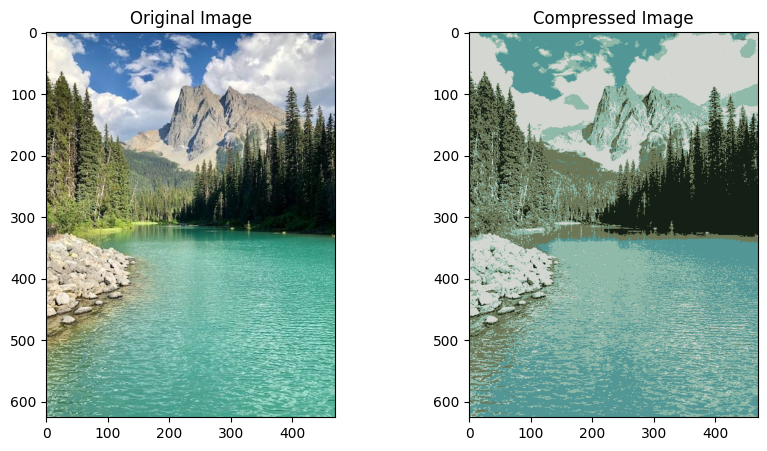

In [42]:
# Display the original and new image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(new_image)
plt.title("Compressed Image")
plt.show()

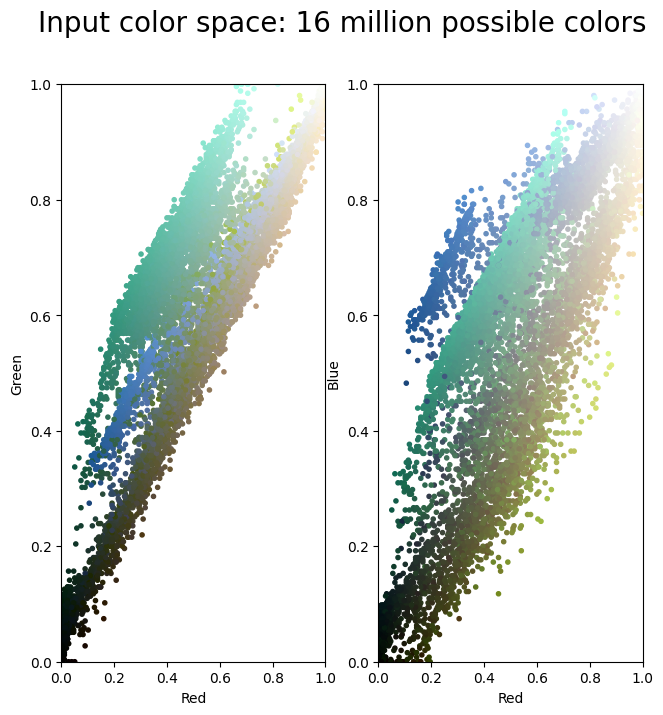

In [43]:
def plot_pixels(data, title, colors=None, N=10000):
  if colors is None:
    colors = image_2d
  # choose a random subset
  rng = np.random.default_rng(0)
  i = rng.permutation(image_2d.shape[0])[:N]
  colors = colors[i]
  # Normalize the color values
  colors = colors / 255
  R, G, B = colors.T
  fig, ax = plt.subplots(1, 2, figsize=(7.5,7.5))
  ax[0].scatter(R, G, color=colors, marker='.')
  ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
  ax[1].scatter(R, B, color=colors, marker='.')
  ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
  fig.suptitle(title, size=20)
plot_pixels(data, title='Input color space: 16 million possible colors')

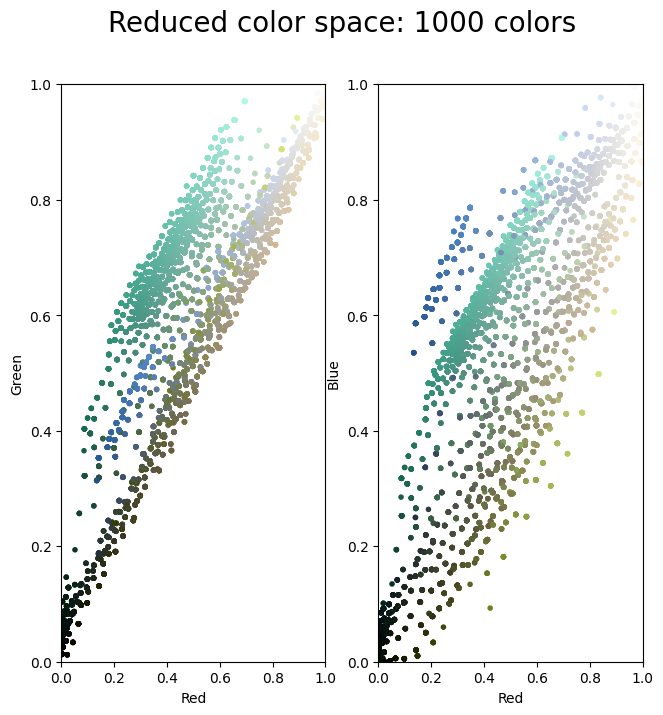

In [44]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(1000)
kmeans.fit(image_2d)
new_colors = kmeans.cluster_centers_[kmeans.predict(image_2d)]
plot_pixels(data, colors=new_colors,
            title="Reduced color space: 1000 colors")